<h1>Computer exercises do capítulo 10 do Wooldridge</h1>

In [33]:
library(foreign);library(tidyverse);library(car);library(dynlm);library(Hmisc)

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




In [ ]:
#joint hypotesis: https://www.econometrics-with-r.org/7-3-joint-hypothesis-testing-using-the-f-statistic.html

#exercicio c1

library(foreign);library(tidyverse)

juros = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\INTDEF.DTA")

head(juros)

In [ ]:
juros$dummy = ifelse(juros$year > 1979, 1, 0)

juros_tibble = as_tibble(juros)
juros_tibble

In [ ]:
juros_tibble %>% select(year, dummy)

summary(lm(juros$i3 ~ juros$inf+juros$def+juros$dummy)) #a dummy é siginificativa

In [6]:
#exercicio c2

barium = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\BARIUM.dta")

#as_tibble(barium$t)

#names(barium)

summary(lm(log(barium$chnimp) ~ barium$t +  log(barium$chempi) + log(barium$gas) + log(barium$rtwex) + barium$befile6 + barium$affile6 + barium$afdec6))

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\BARIUM.dta"):
"cannot read factor labels from Stata 5 files"



Call:
lm(formula = log(barium$chnimp) ~ barium$t + log(barium$chempi) + 
    log(barium$gas) + log(barium$rtwex) + barium$befile6 + barium$affile6 + 
    barium$afdec6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94317 -0.31168  0.03172  0.36366  1.21218 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        -2.367308  20.782159  -0.114  0.90949   
barium$t            0.012706   0.003844   3.305  0.00124 **
log(barium$chempi) -0.686233   1.239711  -0.554  0.58090   
log(barium$gas)     0.465669   0.876178   0.531  0.59605   
log(barium$rtwex)   0.078222   0.472440   0.166  0.86877   
barium$befile6      0.090470   0.251289   0.360  0.71945   
barium$affile6      0.097006   0.257313   0.377  0.70683   
barium$afdec6      -0.351502   0.282542  -1.244  0.21584   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5748 on 123 degrees of freedom
Multiple R-squared:  0.3616,	Adjusted R-squar

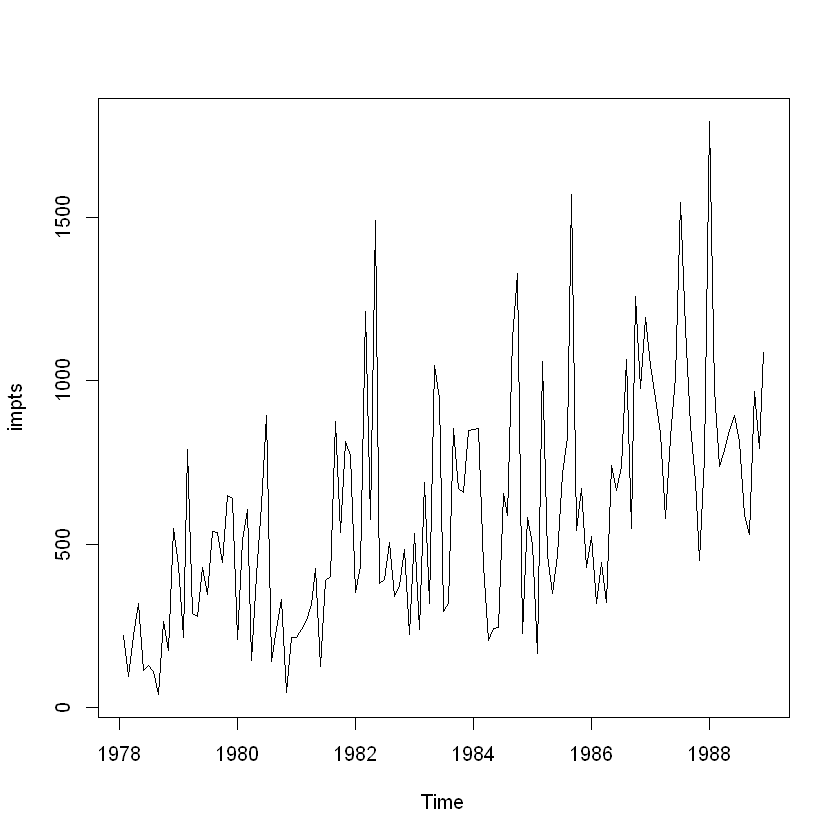

In [7]:
impts = ts(barium$chnimp, start=c(1978,2), frequency=12)
plot(impts)

In [8]:

model = lm(chnimp ~ t + chempi +gas + rtwex + befile6 + affile6 + afdec6, data=barium)
summary(model)


Call:
lm(formula = chnimp ~ t + chempi + gas + rtwex + befile6 + affile6 + 
    afdec6, data = barium)

Residuals:
    Min      1Q  Median      3Q     Max 
-451.46 -201.80  -44.66  152.85  927.92 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.562e+02  7.705e+02   0.592 0.554881    
t            7.044e+00  2.030e+00   3.470 0.000718 ***
chempi      -5.033e+00  5.247e+00  -0.959 0.339342    
gas          4.792e-08  5.319e-08   0.901 0.369397    
rtwex       -1.167e+00  2.363e+00  -0.494 0.622316    
befile6      4.169e+01  1.279e+02   0.326 0.744938    
affile6      4.344e+01  1.311e+02   0.331 0.741007    
afdec6      -1.341e+02  1.487e+02  -0.902 0.368758    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 293.1 on 123 degrees of freedom
Multiple R-squared:  0.3346,	Adjusted R-squared:  0.2968 
F-statistic: 8.838 on 7 and 123 DF,  p-value: 8.811e-09


In [12]:
linearHypothesis(model, c("gas=0", "chempi=0", "rtwex=0", "befile6=0", "affile6=0", "afdec6=0"))

ERROR: Error in solve.default(vcov.hyp): system is computationally singular: reciprocal condition number = 6.8752e-20


In [15]:
model = lm(chnimp ~ t + chempi +gas + rtwex + befile6 + affile6 + afdec6 + feb + mar+ apr+ may + jun + jul + aug+ sep + oct+ nov + dec, data=barium)

In [17]:
#exercicio c3

puerto_rico = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\PRMINWGE.dta")

summary(lm(log(prepop) ~   log(mincov) + log(usgnp) + t, data=puerto_rico)) #tudo é significativo com a trend

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\PRMINWGE.dta"):
"cannot read factor labels from Stata 5 files"



Call:
lm(formula = log(prepop) ~ log(mincov) + log(usgnp) + t, data = puerto_rico)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049493 -0.024424 -0.009596  0.017055  0.086354 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.696300   1.295762  -6.711 1.04e-07 ***
log(mincov) -0.168695   0.044246  -3.813 0.000552 ***
log(usgnp)   1.057351   0.176637   5.986 8.98e-07 ***
t           -0.032354   0.005023  -6.442 2.31e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03793 on 34 degrees of freedom
Multiple R-squared:  0.8471,	Adjusted R-squared:  0.8336 
F-statistic: 62.78 on 3 and 34 DF,  p-value: 6.007e-14


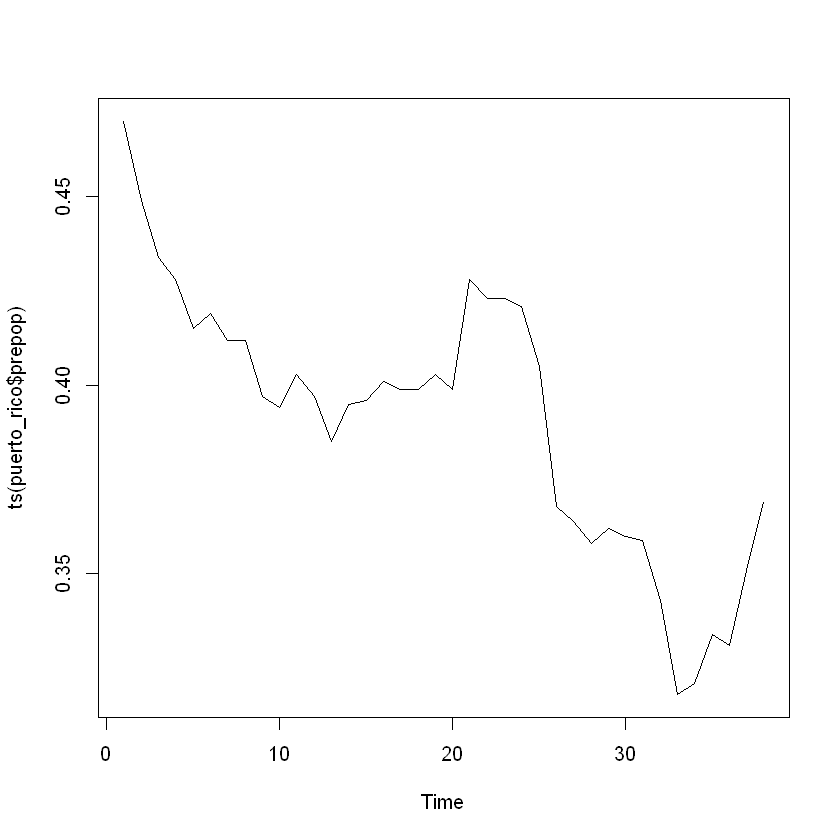

In [18]:
plot(ts(puerto_rico$prepop))

In [19]:
summary(lm(log(prepop) ~   log(mincov) + log(usgnp) + t + log(prgnp), data=puerto_rico))


Call:
lm(formula = log(prepop) ~ log(mincov) + log(usgnp) + t + log(prgnp), 
    data = puerto_rico)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.054679 -0.023653 -0.004039  0.018638  0.076947 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.663442   1.257829  -5.298 7.67e-06 ***
log(mincov) -0.212261   0.040152  -5.286 7.92e-06 ***
log(usgnp)   0.486048   0.221982   2.190   0.0357 *  
t           -0.026663   0.004627  -5.763 1.94e-06 ***
log(prgnp)   0.285238   0.080492   3.544   0.0012 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03277 on 33 degrees of freedom
Multiple R-squared:  0.8892,	Adjusted R-squared:  0.8758 
F-statistic: 66.23 on 4 and 33 DF,  p-value: 2.677e-15


In [21]:
#exercicio c4

library(dynlm)

fertilidade = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.dta")
tsdata = ts(fertilidade, start=1913)

res = dynlm(gfr ~ pe + L(pe)  + L(pe, 2) + ww2 + pill, data=tsdata)
summary(res)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.dta"):
"cannot read factor labels from Stata 5 files"



Time series regression with "ts" data:
Start = 1915, End = 1984

Call:
dynlm(formula = gfr ~ pe + L(pe) + L(pe, 2) + ww2 + pill, data = tsdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.6461  -9.5409  -0.0312   8.3378  29.1295 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  95.87050    3.28196  29.211  < 2e-16 ***
pe            0.07267    0.12553   0.579   0.5647    
L(pe)        -0.00578    0.15566  -0.037   0.9705    
L(pe, 2)      0.03383    0.12626   0.268   0.7896    
ww2         -22.12650   10.73197  -2.062   0.0433 *  
pill        -31.30499    3.98156  -7.862 5.63e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.27 on 64 degrees of freedom
Multiple R-squared:  0.4986,	Adjusted R-squared:  0.4594 
F-statistic: 12.73 on 5 and 64 DF,  p-value: 1.353e-08


In [22]:
#exercicio c5

ez = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\EZANDERS.DTA")

modelo = (lm(log(uclms) ~ feb + mar + apr + may+ jun + jul + aug + sep + oct + nov + dec, data=ez))
summary(modelo)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\EZANDERS.DTA"):
"cannot read factor labels from Stata 5 files"



Call:
lm(formula = log(uclms) ~ feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec, data = ez)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7698 -0.3984 -0.2336  0.4543  1.4271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.00365    0.20006  45.005  < 2e-16 ***
feb         -0.01323    0.28293  -0.047  0.96281    
mar         -0.06616    0.28293  -0.234  0.81560    
apr         -0.36493    0.28293  -1.290  0.20024    
may         -0.51478    0.28293  -1.819  0.07199 .  
jun         -0.55412    0.28293  -1.959  0.05310 .  
jul         -0.51916    0.28293  -1.835  0.06964 .  
aug         -0.33785    0.28293  -1.194  0.23541    
sep         -0.75286    0.28293  -2.661  0.00915 ** 
oct         -0.78679    0.28293  -2.781  0.00654 ** 
nov         -0.68167    0.28293  -2.409  0.01791 *  
dec         -0.29078    0.29163  -0.997  0.32127    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard er

In [23]:
#exercicio c6: detrending

fertility = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.DTA")

model = lm(gfr ~ t + tsq, data=fertility)
summary(model)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.DTA"):
"cannot read factor labels from Stata 5 files"



Call:
lm(formula = gfr ~ t + tsq, data = fertility)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.7519 -12.5333   0.3168  13.7611  28.7346 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 107.056263   6.049651  17.696   <2e-16 ***
t             0.071697   0.382446   0.187    0.852    
tsq          -0.007959   0.005077  -1.568    0.122    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.64 on 69 degrees of freedom
Multiple R-squared:  0.3141,	Adjusted R-squared:  0.2942 
F-statistic:  15.8 on 2 and 69 DF,  p-value: 2.243e-06


In [24]:
dot_gfr = residuals(model)
fertility$dot_gfr = dot_gfr
summary(lm(gfr ~ t + tsq + ww2 + pe + pill , data=fertility))


Call:
lm(formula = gfr ~ t + tsq + ww2 + pe + pill, data = fertility)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.9791  -6.9775  -0.2713   7.7975  19.9861 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 124.091935   4.360738  28.457  < 2e-16 ***
t            -2.531426   0.389386  -6.501 1.24e-08 ***
tsq           0.019613   0.004971   3.945 0.000196 ***
ww2         -35.880277   5.707921  -6.286 2.95e-08 ***
pe            0.347813   0.040260   8.639 1.91e-12 ***
pill        -10.119723   6.336094  -1.597 0.115008    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.74 on 66 degrees of freedom
Multiple R-squared:  0.7267,	Adjusted R-squared:  0.706 
F-statistic: 35.09 on 5 and 66 DF,  p-value: < 2.2e-16


In [25]:
model = lm(dot_gfr ~ t + tsq + ww2 + pe + pill , data=fertility)
summary(model) #as variaveis ainda sao significativas mesmo com a variavei detrended 


Call:
lm(formula = dot_gfr ~ t + tsq + ww2 + pe + pill, data = fertility)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.9791  -6.9775  -0.2713   7.7975  19.9861 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.035673   4.360738   3.907 0.000223 ***
t            -2.603123   0.389386  -6.685 5.86e-09 ***
tsq           0.027572   0.004971   5.546 5.53e-07 ***
ww2         -35.880277   5.707921  -6.286 2.95e-08 ***
pe            0.347813   0.040260   8.639 1.91e-12 ***
pill        -10.119723   6.336094  -1.597 0.115008    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.74 on 66 degrees of freedom
Multiple R-squared:  0.6015,	Adjusted R-squared:  0.5713 
F-statistic: 19.92 on 5 and 66 DF,  p-value: 4.719e-12


In [26]:
fertility$t_3 = fertility$t^3

summary(lm(gfr ~ t + tsq + t_3 + ww2 + pe + pill , data=fertility)) #é significativo mas nao faz sentido logico


Call:
lm(formula = gfr ~ t + tsq + t_3 + ww2 + pe + pill, data = fertility)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4463  -6.0271   0.3312   6.5957  17.7281 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.428e+02  4.338e+00  32.919  < 2e-16 ***
t           -5.612e+00  5.428e-01 -10.340 2.32e-15 ***
tsq          1.554e-01  2.030e-02   7.653 1.21e-10 ***
t_3         -1.290e-03  1.894e-04  -6.809 3.77e-09 ***
ww2         -1.905e+01  5.042e+00  -3.778 0.000346 ***
pe           1.619e-01  4.131e-02   3.920 0.000216 ***
pill        -2.501e+01  5.346e+00  -4.679 1.51e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.267 on 65 degrees of freedom
Multiple R-squared:  0.8405,	Adjusted R-squared:  0.8257 
F-statistic: 57.07 on 6 and 65 DF,  p-value: < 2.2e-16


In [27]:
#exercicio c7

consumption = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\CONSUMP.dta")
summary(lm(gc ~ gy, data=consumption)) #nao sei qual variavel usar


Call:
lm(formula = gc ~ gy, data = consumption)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0140496 -0.0035407 -0.0005813  0.0044080  0.0116890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.008079   0.001899   4.254 0.000155 ***
gy          0.570781   0.067354   8.474 6.75e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.007268 on 34 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6787,	Adjusted R-squared:  0.6692 
F-statistic: 71.81 on 1 and 34 DF,  p-value: 6.754e-10


In [28]:
#exercicio c8 

fertility = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.DTA")

model = (lm(gfr ~ pe_3 + pe_2 + pe_1 + pe_4 + ww2 + pe + pill , data=fertility))
summary(model)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.DTA"):
"cannot read factor labels from Stata 5 files"



Call:
lm(formula = gfr ~ pe_3 + pe_2 + pe_1 + pe_4 + ww2 + pe + pill, 
    data = fertility)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.226  -9.528  -1.111   8.016  27.068 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.501551   3.325483  27.816  < 2e-16 ***
pe_3          0.018083   0.153589   0.118   0.9067    
pe_2          0.007395   0.165102   0.045   0.9644    
pe_1         -0.003977   0.153111  -0.026   0.9794    
pe_4          0.013940   0.105024   0.133   0.8948    
ww2         -21.343483  11.540771  -1.849   0.0693 .  
pe            0.088749   0.126185   0.703   0.4846    
pill        -31.081643   3.896868  -7.976 5.38e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.67 on 60 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5368,	Adjusted R-squared:  0.4828 
F-statistic: 9.934 on 7 and 60 DF,  p-value: 3.633e-08


In [29]:
linearHypothesis(model, c("pe_3=0", "pe_4=0")) #há pouca força contra h0

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,62,11236.35,NA,NA,NA,NA
2,60,11213.10,2,23.25285,0.06221168,0.9397445


In [30]:
fertility$pet_1_menos_pet = fertility$pe_1 - fertility$pe
fertility$pet_2_menos_pet = fertility$pe_2 - fertility$pe
fertility$pet_3_menos_pet = fertility$pe_3 - fertility$pe
fertility$pet_4_menos_pet = fertility$pe_4 - fertility$pe

In [31]:

model = (lm(gfr ~ pet_1_menos_pet + pet_2_menos_pet + pet_3_menos_pet + pet_4_menos_pet + ww2 + pe + pill , data=fertility))
summary(model)


Call:
lm(formula = gfr ~ pet_1_menos_pet + pet_2_menos_pet + pet_3_menos_pet + 
    pet_4_menos_pet + ww2 + pe + pill, data = fertility)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.226  -9.528  -1.111   8.016  27.068 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      92.501551   3.325483  27.816  < 2e-16 ***
pet_1_menos_pet  -0.003977   0.153111  -0.026   0.9794    
pet_2_menos_pet   0.007395   0.165102   0.045   0.9644    
pet_3_menos_pet   0.018083   0.153589   0.118   0.9067    
pet_4_menos_pet   0.013940   0.105024   0.133   0.8948    
ww2             -21.343483  11.540771  -1.849   0.0693 .  
pe                0.124190   0.029572   4.200 9.00e-05 ***
pill            -31.081643   3.896868  -7.976 5.38e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.67 on 60 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5368,	Adjusted R-squared:  0.

In [32]:
sum(coefficients(model))

[1] 40.23606

In [34]:
#exercicio c9


volat = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\VOLAT.dta")

describe(volat)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\VOLAT.dta"):
"cannot read factor labels from Stata 5 files"


volat 

 17  Variables      558  Observations
--------------------------------------------------------------------------------
date 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     558        0      558        1     1970    15.53     1949     1951 
     .25      .50      .75      .90      .95 
    1958     1970     1981     1988     1991 

lowest : 1947.01 1947.02 1947.03 1947.04 1947.05
highest: 1993.02 1993.03 1993.04 1993.05 1993.06
--------------------------------------------------------------------------------
sp500 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     558        0      549        1    118.3    103.3    15.88    22.84 
     .25      .50      .75      .90      .95 
   48.82    92.28   127.93   293.10   363.76 

lowest :  13.97  14.10  14.30  14.34  14.60, highest: 441.70 443.08 445.25 448.06 450.16
--------------------------------------------------------------------------------
divyld 
       n  missing distinc

In [35]:
model = lm(rsp500 ~ pcip + i3, data=volat)
summary(model) #nada é significativo fora o juros pq é do msm período


Call:
lm(formula = rsp500 ~ pcip + i3, data = volat)

Residuals:
     Min       1Q   Median       3Q      Max 
-157.871  -22.580    2.103   25.524  138.137 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.84306    3.27488   5.754 1.44e-08 ***
pcip         0.03642    0.12940   0.281   0.7785    
i3          -1.36169    0.54072  -2.518   0.0121 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40.13 on 554 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01189,	Adjusted R-squared:  0.008325 
F-statistic: 3.334 on 2 and 554 DF,  p-value: 0.03637


In [36]:
#exercicio c10

int = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\INTDEF.dta")
head(int)



Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\INTDEF.dta"):
"cannot read factor labels from Stata 5 files"


,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1948,1.04,8.1,16.4,11.7,-4.6999998,NA,NA,NA,NA,NA,NA,0
2,1949,1.10,-1.2,14.6,14.4,-0.2000008,1.04,8.1,-4.6999998,0.06000006,-9.3,4.499999,0
3,1950,1.22,1.3,14.5,15.6,1.1000004,1.10,-1.2,-0.2000008,0.12000000,2.5,1.300001,0
4,1951,1.55,7.9,16.1,14.2,-1.9000006,1.22,1.3,1.1000004,0.32999992,6.6,-3.000001,0
5,1952,1.77,1.9,18.9,19.4,0.5000000,1.55,7.9,-1.9000006,0.22000003,-6.0,2.400001,0
6,1953,1.93,0.8,18.7,20.4,1.6999989,1.77,1.9,0.5000000,0.15999997,-1.1,1.199999,0


In [37]:
cor(int$inf, int$def) #muito baixa

[1] 0.04831843

In [38]:
#modelo lagado
res = dynlm(i3 ~ inf + inf_1 + def_1 + def, data=int)
summary(res)


Time series regression with "numeric" data:
Start = 1, End = 48

Call:
dynlm(formula = i3 ~ inf + inf_1 + def_1 + def, data = int)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5343 -0.8083  0.3843  0.8445  3.2270 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.2346     0.4410   2.799  0.00764 **
inf           0.4252     0.1289   3.299  0.00196 **
inf_1         0.2732     0.1413   1.934  0.05969 . 
def_1         0.4047     0.2175   1.860  0.06968 . 
def           0.1630     0.2570   0.634  0.52914   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.613 on 43 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7242,	Adjusted R-squared:  0.6986 
F-statistic: 28.23 on 4 and 43 DF,  p-value: 1.553e-11


In [39]:
#exercicio c11

trafego = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\TRAFFIC2.dta")
head(trafego)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\TRAFFIC2.dta"):
"cannot read factor labels from Stata 5 files"


,year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,rtotacc,...,lrfatacc,lntotacc,lnfatacc,prcnfat,lushigh,lcntyrds,lstrtes,spdt,beltt,prcfat_1
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,1981,40511,365,15626,24520,38235,323,14743,23169,236,...,2.484907,10.55151,5.777652,0.8447757,6.963190,8.830251,8.153062,0,0,NA
2,1981,36034,329,14469,21236,33989,294,13620,20075,200,...,2.079442,10.43379,5.683580,0.8649857,6.839477,8.708970,8.046550,0,0,0.9009899
3,1981,40328,369,16026,23933,37990,335,15105,22550,253,...,2.484907,10.54508,5.814130,0.8818110,7.041412,8.825119,8.148446,0,0,0.9130266
4,1981,37699,369,15560,21770,35457,326,14654,20477,270,...,2.639057,10.47608,5.786897,0.9194235,6.916715,8.750525,8.071531,0,0,0.9149970
5,1981,38816,355,16546,21915,36611,321,15569,20721,263,...,1.791759,10.50810,5.771441,0.8767856,6.986567,8.816705,8.111928,0,0,0.9788058
6,1981,38900,422,16778,21700,36555,376,15747,20432,290,...,2.772589,10.50657,5.929589,1.0285871,6.931472,8.805076,8.171317,0,0,0.9145713


In [40]:
subset(trafego, spdlaw == 1) 
model = lm(log(totacc) ~ t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw, data=trafego)
summary(model)

,year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,rtotacc,...,lrfatacc,lntotacc,lnfatacc,prcnfat,lushigh,lcntyrds,lstrtes,spdt,beltt,prcfat_1
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
77,1987,47072,421,20406,26245,43381,368,18967,24046,375,...,2.890372,10.67778,5.908083,0.8482977,7.129298,8.896451,8.217169,77,77,0.8773477
78,1987,47090,404,20239,26447,42979,352,18659,23968,418,...,2.890372,10.66847,5.863631,0.8190047,7.169350,8.902864,8.237479,78,78,0.8943746
79,1987,48880,430,20840,27610,44645,369,19283,24993,431,...,2.564949,10.70650,5.910797,0.8265203,7.262629,8.907071,8.312135,79,79,0.8579317
80,1987,48357,500,20443,27414,44119,434,18845,24840,428,...,3.135494,10.69465,6.073044,0.9837032,7.226936,8.901094,8.349011,80,80,0.8797054
81,1987,46768,467,19611,26690,42662,410,18068,24184,412,...,2.944439,10.66106,6.016157,0.9610426,7.162397,8.883779,8.197538,81,81,1.0339764
82,1987,52326,432,21741,30153,47557,369,19963,27225,408,...,2.944439,10.76968,5.910797,0.7759110,7.226209,8.954415,8.371011,82,82,0.9985460
83,1987,48475,403,19700,28372,44027,362,18085,25580,381,...,2.564949,10.69256,5.891644,0.8222227,7.229839,8.879055,8.313117,83,83,0.8255934
84,1987,51924,409,20254,31261,47241,364,18539,28338,393,...,2.564949,10.76302,5.897154,0.7705171,7.287560,8.962520,8.349957,84,84,0.8313563
85,1988,43569,333,17452,25784,39595,287,15998,23310,293,...,2.079442,10.58646,5.659482,0.7248390,7.060476,8.776167,8.133294,85,85,0.7876897



Call:
lm(formula = log(totacc) ~ t + feb + mar + apr + may + jun + 
    jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + 
    beltlaw, data = trafego)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.084489 -0.023998 -0.002176  0.024586  0.089315 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.6398628  0.0630859 168.657  < 2e-16 ***
t            0.0011011  0.0002579   4.270 4.79e-05 ***
feb         -0.0338346  0.0177683  -1.904  0.06004 .  
mar          0.0769530  0.0167941   4.582 1.46e-05 ***
apr          0.0104562  0.0170469   0.613  0.54115    
may          0.0237075  0.0169389   1.400  0.16504    
jun          0.0219334  0.0172149   1.274  0.20587    
jul          0.0499292  0.0167036   2.989  0.00360 ** 
aug          0.0559523  0.0168173   3.327  0.00127 ** 
sep          0.0420694  0.0172819   2.434  0.01687 *  
oct          0.0817170  0.0169554   4.820 5.73e-06 ***
nov          0.0768721  0.0172455   4.458 2.36e

In [42]:
mean(trafego$prcfat) #porcentagem de acidentes com pelo menos uma morte.
max(trafego$prcfat) #no ano maximo, em 1.2% dos acidentes houve morte

[1] 0.8856363

[1] 1.216828

In [43]:
model = lm(log(prcfat) ~ t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw, data=trafego)
summary(model)


Call:
lm(formula = log(prcfat) ~ t + feb + mar + apr + may + jun + 
    jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + 
    beltlaw, data = trafego)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152394 -0.039533  0.008095  0.040703  0.111459 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0226685  0.1156387   0.196 0.845025    
t           -0.0023642  0.0004727  -5.002 2.75e-06 ***
feb         -0.0003145  0.0325699  -0.010 0.992317    
mar         -0.0004177  0.0307841  -0.014 0.989203    
apr          0.0686155  0.0312475   2.196 0.030644 *  
may          0.0861456  0.0310496   2.774 0.006710 ** 
jun          0.1139442  0.0315556   3.611 0.000499 ***
jul          0.1939713  0.0306183   6.335 8.88e-09 ***
aug          0.2126589  0.0308267   6.899 6.80e-10 ***
sep          0.1790614  0.0316783   5.652 1.80e-07 ***
oct          0.1175294  0.0310799   3.782 0.000278 ***
nov          0.0168031  0.0316116   0.532 0.596

In [44]:
#exercicio c12

philips = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\PHILLIPS.dta")
describe(philips)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\PHILLIPS.dta"):
"cannot read factor labels from Stata 5 files"


philips 

 11  Variables      49  Observations
--------------------------------------------------------------------------------
year 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      49        0       49        1     1972    16.67     1950     1953 
     .25      .50      .75      .90      .95 
    1960     1972     1984     1991     1994 

lowest : 1948 1949 1950 1951 1952, highest: 1992 1993 1994 1995 1996
--------------------------------------------------------------------------------
unem 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      49        0       33    0.998    5.741    1.759     3.38     3.76 
     .25      .50      .75      .90      .95 
    4.90     5.60     6.80     7.52     8.18 

lowest : 2.9 3.0 3.3 3.5 3.6, highest: 7.6 7.7 8.5 9.6 9.7
--------------------------------------------------------------------------------
inf 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      49      

In [45]:
model = lm(inf ~ unem, data=philips)
summary(model) #???


Call:
lm(formula = inf ~ unem, data = philips)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3826 -1.9797 -0.7229  1.3577  8.7562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.4236     1.7190   0.828    0.412
unem          0.4676     0.2891   1.617    0.112

Residual standard error: 3.131 on 47 degrees of freedom
Multiple R-squared:  0.05272,	Adjusted R-squared:  0.03257 
F-statistic: 2.616 on 1 and 47 DF,  p-value: 0.1125
